<a href="https://colab.research.google.com/github/EnigmaBull97/Tugas_Artificial_Intelligence/blob/main/Tugas_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import numpy as np
from sklearn.datasets import make_circles, make_classification

# Circle dataset
X_circle, y_circle = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# XOR dataset
X_xor, y_xor = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2)

# Spiral dataset
def generate_spiral(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return np.hstack((d1x, d1y))

n_points = 500
X_spiral = np.vstack((generate_spiral(n_points), generate_spiral(n_points)))
y_spiral = np.hstack((np.zeros(n_points), np.ones(n_points)))

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_circle_poly = poly.fit_transform(X_circle)
X_xor_poly = poly.fit_transform(X_xor)
X_spiral_poly = poly.fit_transform(X_spiral)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential([
        Dense(4, input_shape=(input_shape,), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create models for each dataset
model_circle = build_model(X_circle_poly.shape[1])
model_xor = build_model(X_xor_poly.shape[1])
model_spiral = build_model(X_spiral_poly.shape[1])

In [5]:
# Training and evaluating circle model
model_circle.fit(X_circle_poly, y_circle, epochs=100, batch_size=32, verbose=0)
loss_circle, acc_circle = model_circle.evaluate(X_circle_poly, y_circle, verbose=0)

# Training and evaluating XOR model
model_xor.fit(X_xor_poly, y_xor, epochs=100, batch_size=32, verbose=0)
loss_xor, acc_xor = model_xor.evaluate(X_xor_poly, y_xor, verbose=0)

# Training and evaluating spiral model
model_spiral.fit(X_spiral_poly, y_spiral, epochs=100, batch_size=32, verbose=0)
loss_spiral, acc_spiral = model_spiral.evaluate(X_spiral_poly, y_spiral, verbose=0)

results = {
    "circle": {"loss": loss_circle, "accuracy": acc_circle},
    "xor": {"loss": loss_xor, "accuracy": acc_xor},
    "spiral": {"loss": loss_spiral, "accuracy": acc_spiral},
}

print(results)


{'circle': {'loss': 0.001316227950155735, 'accuracy': 1.0}, 'xor': {'loss': 0.16009138524532318, 'accuracy': 0.9350000023841858}, 'spiral': {'loss': 0.6928539872169495, 'accuracy': 0.5059999823570251}}


5645/5645 [==============================] - 13s 2ms/step


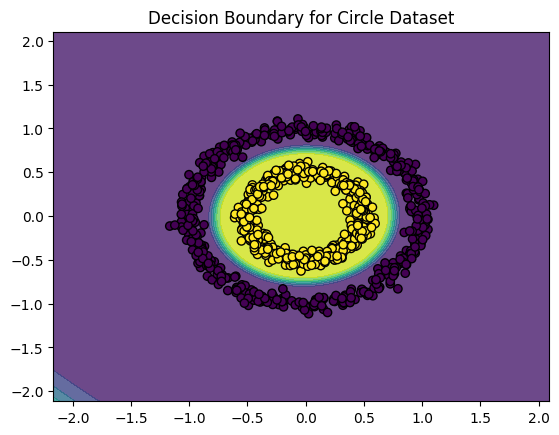

17388/17388 [==============================] - 26s 2ms/step


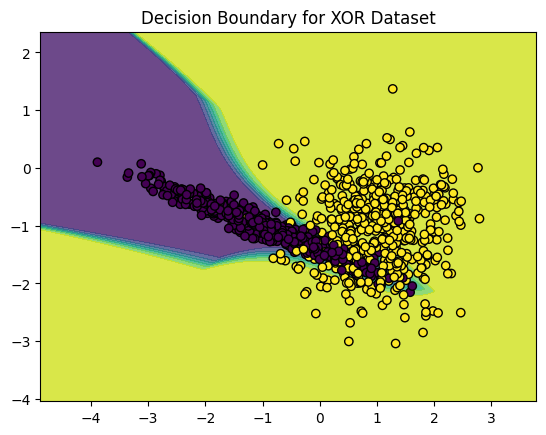

199520/199520 [==============================] - 324s 2ms/step


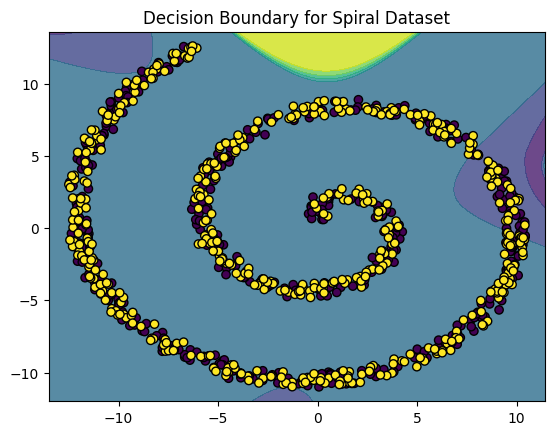

In [7]:
# Visualization
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y, poly, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(model_circle, X_circle, y_circle, poly, "Decision Boundary for Circle Dataset")
plot_decision_boundary(model_xor, X_xor, y_xor, poly, "Decision Boundary for XOR Dataset")
plot_decision_boundary(model_spiral, X_spiral, y_spiral, poly, "Decision Boundary for Spiral Dataset")